# Telecom Customer Churn Analysis & Prediction
### Data Preprocessing Notebook
### Author : Harsh Navin Gupta

## Sections
1. <a href='#import_lib'>Importing Libraries</a>
2. <a href='#read_data'>Reading Dataset</a>
3. <a href='#balance_data'>Creating Balanced Dataset</a>
4. <a href='#ohe'>One Hot Encoding</a>
5. <a href='#label_en'>Label Encoding</a>
6. <a href='#drop_col'>Dropping Unnecessary Columns</a>
7. <a href='#save_data'>Saving Dataset</a>

<a id='import_lib'></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='read_data'></a>

## Reading Dataset

In [2]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id='balance_data'></a>

## Creating Balanced Dataset

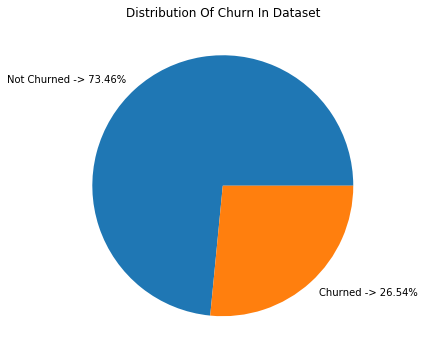

In [4]:
plt.figure(figsize=(6,6))
counts = [dataset['Churn'].value_counts().iloc[0], dataset['Churn'].value_counts().iloc[1]]
labels = ['Not Churned -> ' + str(round(counts[0]/dataset.shape[0]*100,2)) + '%', 'Churned -> ' + str(round(counts[1]/dataset.shape[0]*100,2)) + '%']
plt.pie(counts, labels=labels)
plt.title('Distribution Of Churn In Dataset')
plt.show()

In [5]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
churned_data = dataset[dataset['Churn'] == 'Yes'] 
not_churned_data = dataset[dataset['Churn'] == 'No'].sample(n=1869, random_state=300)
dataset = pd.concat([churned_data, not_churned_data])

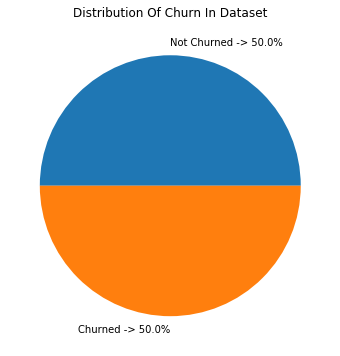

In [7]:
plt.figure(figsize=(6,6))
counts = [dataset['Churn'].value_counts().iloc[0], dataset['Churn'].value_counts().iloc[1]]
labels = ['Not Churned -> ' + str(round(counts[0]/dataset.shape[0]*100,2)) + '%', 'Churned -> ' + str(round(counts[1]/dataset.shape[0]*100,2)) + '%']
plt.pie(counts, labels=labels)
plt.title('Distribution Of Churn In Dataset')
plt.show()

<a id='ohe'></a>

## One Hot Encoding

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 2 to 3883
Data columns (total 21 columns):
customerID          3738 non-null object
gender              3738 non-null object
SeniorCitizen       3738 non-null int64
Partner             3738 non-null object
Dependents          3738 non-null object
tenure              3738 non-null int64
PhoneService        3738 non-null object
MultipleLines       3738 non-null object
InternetService     3738 non-null object
OnlineSecurity      3738 non-null object
OnlineBackup        3738 non-null object
DeviceProtection    3738 non-null object
TechSupport         3738 non-null object
StreamingTV         3738 non-null object
StreamingMovies     3738 non-null object
Contract            3738 non-null object
PaperlessBilling    3738 non-null object
PaymentMethod       3738 non-null object
MonthlyCharges      3738 non-null float64
TotalCharges        3738 non-null object
Churn               3738 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
col_names = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
 'TechSupport','StreamingMovies','StreamingTV','Contract','PaperlessBilling',
 'PaymentMethod']
dataset = pd.get_dummies(dataset, columns=col_names)

In [10]:
dataset.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,8,99.65,820.5,Yes,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
8,7892-POOKP,28,104.80,3046.05,Yes,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
13,0280-XJGEX,49,103.70,5036.3,Yes,0,1,1,0,1,...,1,1,0,0,0,1,1,0,0,0


<a id='label_en'></a>

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
dataset['Churn'] = label_bin.fit_transform(dataset['Churn'])

<a id='drop_col'></a>

## Dropping Unnecessary Columns

In [12]:
dataset.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)

In [13]:
dataset.head()

,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,2,53.85,1,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,2,70.70,1,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,8,99.65,1,1,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
8,28,104.80,1,1,0,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
13,49,103.70,1,0,1,1,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0


<a id='save_data'></a>

## Saving Dataset

In [14]:
dataset.to_csv('preprocessed_dataset.csv')